In [191]:
import keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq as hq

from keras.models import Model, Sequential
from keras.layers import Input, Dense, LSTM
from keras.optimizers import Adam, SGD

In [192]:
Y = np.zeros((715, 8), dtype=np.uint32)
D = dict()

In [193]:
with open('data/0/costanera2.csv', 'r') as istream:
    for line in istream:
        if line == '\n': continue
        for tup in line.split(';'):
            id_prod, y, z = tuple(map(int, tup.split(',')))
            if id_prod not in D:
                D[id_prod] = [0,0,0]
            D[id_prod][0] += 1 #days sold
            D[id_prod][1] += y #count
            D[id_prod][2] += z #money

In [194]:
best4 = hq.nlargest(4, D.items(), key=lambda x: x[1])
best4

[(168757, [714, 80308, 92052]),
 (4385959, [714, 48575, 8846073]),
 (2678016, [698, 6137, 70037231]),
 (4695904, [673, 2809, 1086225])]

In [195]:
M = dict((original_id, position) for position, original_id in enumerate([best[0] for best in best4]))
M

{168757: 0, 4385959: 1, 2678016: 2, 4695904: 3}

In [196]:
with open('data/0/costanera2.csv', 'r') as istream:
    day = -1
    for line in istream:
        if line == '\n': continue
        day += 1
        for tup in line.split(';'):
            id_prod, count, price = tuple(map(int, tup.split(',')))
            if id_prod in M:
                Y[day][M[id_prod]] = count #count
                Y[day][M[id_prod] + 4] = count * price #sales

In [197]:
S = Y[:,4:] #Sales per day in CLP
C = Y[:,:4] #Sales count per day

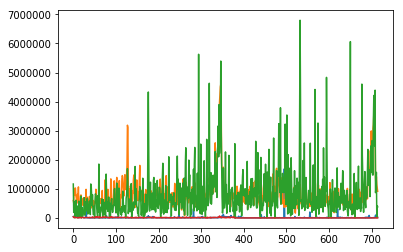

In [198]:
plt.plot(S)
plt.show()

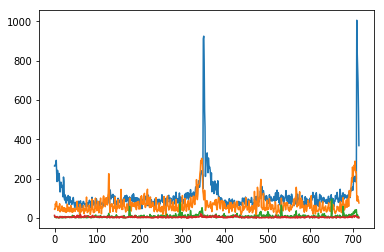

In [199]:
plt.plot(C)
plt.show()

In [200]:
X_train = np.array([Y.T[:,:-30]])
X_train.shape

(1, 8, 685)

In [201]:
Y_train = np.array([Y.T[:,30:]])
Y_train.shape

(1, 8, 685)

In [202]:
batch_input_shape = X_train.shape
batch_input_shape

(1, 8, 685)

In [203]:
model = Sequential()
model.add(LSTM(units=8, return_sequences=False, batch_input_shape=batch_input_shape, dropout=0.1, recurrent_dropout=0.1))

In [204]:
model.compile(optimizer=Adam(), loss='logcosh')

In [205]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (1, 8)                    22208     
Total params: 22,208
Trainable params: 22,208
Non-trainable params: 0
_________________________________________________________________


In [206]:
model.fit(X_train, Y_train[0], epochs=100, validation_split=0.2, batch_size=128)

ValueError: Error when checking target: expected lstm_16 to have shape (8,) but got array with shape (685,)